# Data Preprocessing of Loan Data

## 1. Introduction

In this chapter, we will do the data preprocessing: dropping uninsightful features and imputing missing features. Later, the data preprocessing transformer will be persisted as a single module as a scikit learn joblib file.

Flowchart below explains the data preprocessing step.

![data_prep_flowchart](img/data_prep_flowchart.png)

## 2. Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np
import os
import sys

# general pandas setting
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)

# set parent dir.
parent_dir = os.path.dirname(sys.path[0])

# import dataset and datas subset mask
loan_df_raw = pd.read_csv((parent_dir + '\Datasets\loan_data_2007_2014.csv'), dtype={'desc': 'str'})
variable_mask = pd.read_excel(parent_dir + '\Output\post_screening_variables.xlsx')

### 2.1. Splitting the Train-Test Set

#### **Subsetting `Loan Status`**

In [2]:
loan_df = \
    loan_df_raw[loan_df_raw.loan_status.isin(['Fully Paid', 'Charged Off'])]

loan_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-85,1.00,NaN,NaN,3.00,0.00,13648,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00,Apr-99,5.00,NaN,NaN,3.00,0.00,1687,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.00,Nov-01,2.00,NaN,NaN,2.00,0.00,2956,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.00,Feb-96,1.00,35.00,NaN,10.00,0.00,5598,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.00,Nov-04,3.00,NaN,NaN,9.00,0.00,7963,28.30,12.00,f,0.00,0.00,5631.38,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [4]:
loan_df[~loan_df.emp_length.isna()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-85,1.00,NaN,NaN,3.00,0.00,13648,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00,Apr-99,5.00,NaN,NaN,3.00,0.00,1687,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.00,Nov-01,2.00,NaN,NaN,2.00,0.00,2956,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.00,Feb-96,1.00,35.00,NaN,10.00,0.00,5598,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.00,Nov-04,3.00,NaN,NaN,9.00,0.00,7963,28.30,12.00,f,0.00,0.00,5631.38,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,466276,9695736,11547808,8525,8525,8525.00,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.00,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,medical,Medical expenses,011xx,MA,12.28,4.00,No

In [5]:
len(loan_df.emp_length.isnull())

227214

#### **Creating the `Train-Test Set`**

In [6]:
from sklearn.model_selection import train_test_split

X = loan_df.drop('loan_status', axis=1)
y = loan_df.loan_status

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99
)

We have to make sure that our train set 

### 2.2. Transformer for Dropping Unused Features

In [7]:
variable_mask.loc[
    variable_mask['drop_column'] == 1,
    'variables'
].values

array(['Unnamed: 0', 'id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
       'term', 'emp_title', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line',
       'mths_since_last_delinq', 'mths_since_last_record',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'mths_since_last_major_derog', 'policy_code',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'], dtype=object)

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_dropped = []
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        drop_list = [
            'Unnamed: 0', 'id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
            'emp_title', 'issue_d', 'url', 'desc', 'purpose', 'title', 'term',
            'zip_code', 'addr_state', 'earliest_cr_line',
            'mths_since_last_delinq', 'mths_since_last_record',
            'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
            'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
            'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
            'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
            'last_credit_pull_d', 'mths_since_last_major_derog', 'policy_code',
            'application_type', 'annual_inc_joint', 'dti_joint',
            'verification_status_joint', 'open_acc_6m', 'open_il_6m',
            'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
            'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
            'inq_fi', 'total_cu_tl', 'inq_last_12m'
            ]
        # checking if streamed data has unused features
        self.cols_dropped +=\
            [column for column in X.columns if column in drop_list]
        if self.cols_dropped:
            X_new = X.drop(self.cols_dropped, axis=1)
        return X_new
        

Now let's test our transformer!

In [9]:
drop_transformer = AttributesDropper()
X_train_dropped = drop_transformer.fit_transform(X_train)

X_train_dropped.shape

(181771, 23)

In [10]:
# check if also worked on test set
X_test_dropped = drop_transformer.fit_transform(X_test)
X_test_dropped.shape

(45443, 23)

Later we will chain this transformer in our machine learning pipeline.

### 2.2. Encoding Categorical Features

Our encoding transformer must cover all of the categories that possibly exist, which we can confirm from our original datasets as below:

In [11]:
variable_mask.loc[
    variable_mask['cast_datatype_value'] == 'category',
    'variables'
].values

array(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan'], dtype=object)

In [12]:
category_columns = \
    variable_mask.loc[
        variable_mask['cast_datatype_value'] == 'category',
        'variables'
    ].values
category_dict = {}
for column in category_columns:
    categories = loan_df[column].sort_values(ascending=True).unique()
    category_dict.update({column: list(categories)})

As we recall from Chapter 1 - Data Exploration:

- Some cateogories that are ordinal: `grade`, `subgrade`, `emp_length`
- We should correct the order of employment length (`emp_length`)

In [13]:
category_dict['emp_length']

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan]

In [14]:
category_dict.update({
    'emp_length': [
        '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
        '6 years', '7 years', '8 years', '9 years', '10+ years'
        ]
    })

Note for our categorical encoding:

- For ordinal categories, we are going to use scikit-learn `OrdinalEncoder`, and define the category list for each features
- For other categories, we are going to perform One-Hot-Encoding by using scikit-learn `OneHotEncoder`.

In [15]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# setting up ordinal encoder
grade_ord = OrdinalEncoder(
    categories=[category_dict['grade']],
    handle_unknown='use_encoded_value',
    unknown_value=np.nan)
sub_grade_ord = OrdinalEncoder(
    categories=[category_dict['sub_grade']],
    handle_unknown='use_encoded_value',
    unknown_value=np.nan)
emp_length_ord = OrdinalEncoder(
    categories=[category_dict['emp_length']],
    handle_unknown='use_encoded_value',
    unknown_value=np.nan)

# setting up onehotencoder
home_ownership_onehot = OneHotEncoder(
    categories=[category_dict['home_ownership']])
verif_status_onehot = OneHotEncoder(
    categories=[category_dict['verification_status']])
pymnt_plan_onehot = OneHotEncoder(
    categories=[category_dict['pymnt_plan']])


We are combining all of those encoder into one encoder for specific features by utilizing scikit-learn `ColumnTransformer`:

In [16]:
from sklearn.compose import ColumnTransformer

categorical_encoder = ColumnTransformer([
    ('grade_enc', grade_ord, ['grade']),
    ('sub_grade_enc', sub_grade_ord, ['sub_grade']),
    ('emp_length_enc', emp_length_ord, ['emp_length']),
    ('home_ownership_enc', home_ownership_onehot, ['home_ownership']),
    ('verif_status_enc', verif_status_onehot, ['verification_status']),
    ('pymnt_plan_enc', pymnt_plan_onehot, ['pymnt_plan'])],
    remainder='passthrough'
    )

Now let's test our transformer!

In [17]:
X_train_encoded = \
    categorical_encoder.fit_transform(X_train_dropped)

X_train_encoded.shape

(181771, 31)

Later we will chain this transformer in our machine learning pipeline.

### 2.5. Transforming Numerical Data

#### **Power Transform & Scale the Numerical Data**

Recall our numerical data that are needed to be transformed and scaled:

In [18]:
transform_scale_var = \
    variable_mask.loc[
        (variable_mask['transform'] == 1) | (variable_mask['scale'] == 1), 
        'variables'].values
transform_scale_var

array(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'], dtype=object)

Also from previous chapter, only `dti` that is close to normal distribution.

We are going to use scikit-learn `PowerTransformer`. The transformer will apply the transformer by finding the most optimal power (i.e. the `lambda` value) and apply zero-mean, unit-variance normalization (standardization).

For `dti`, the most optimal `lambda` value shall be around 1.

First, we want to compare the distribution before and after transformed & scaled:

In [19]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# construct the transformer
transformer_scaler = PowerTransformer()

# transform
X_train_num = X_train[transform_scale_var]
X_train_num_trans = transformer_scaler.fit_transform(X_train_num)


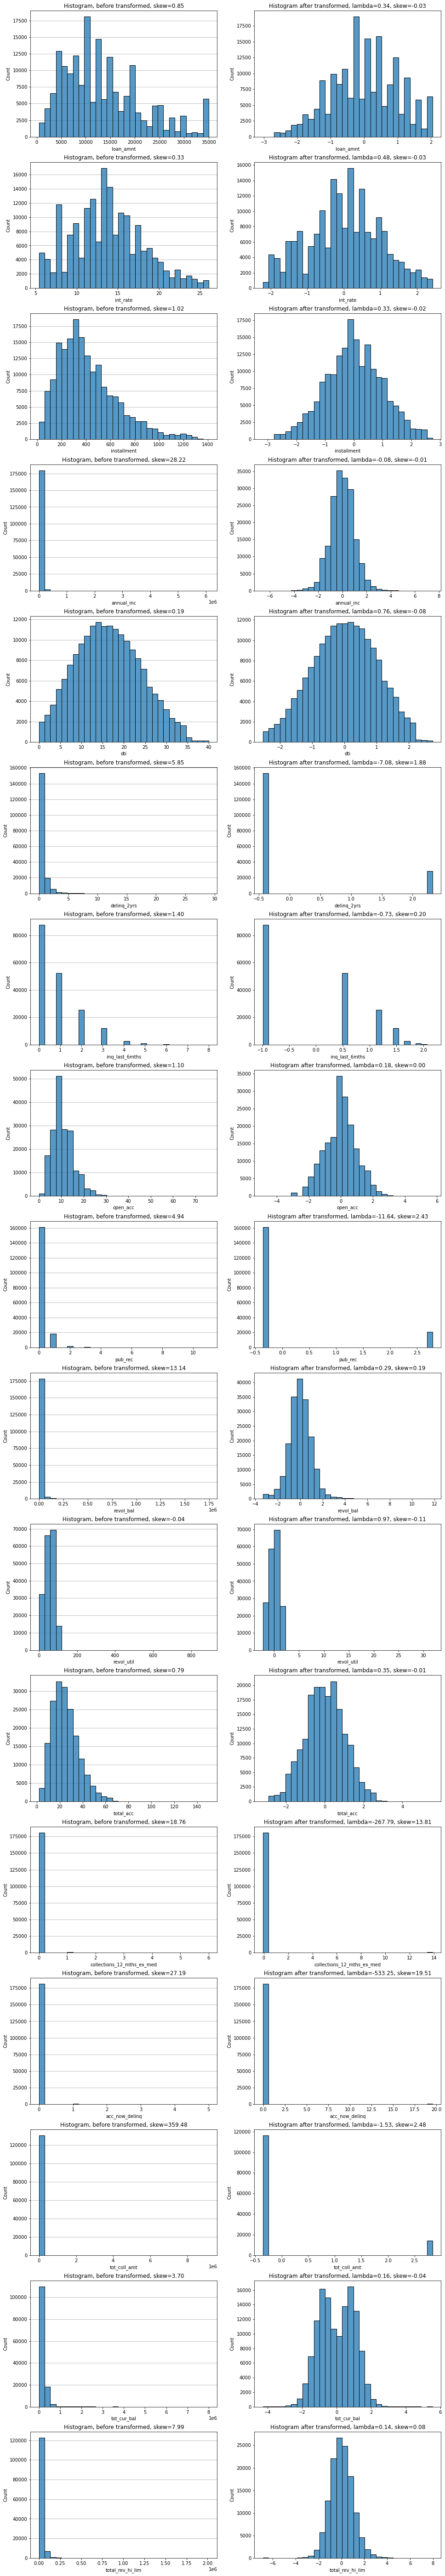

In [20]:
#plotting
n_var = len(transform_scale_var)
fig, axes = plt.subplots(n_var, 2, figsize=(16, n_var * 6))
X_train_num_trans_df = pd.DataFrame(X_train_num_trans)

for ax, (idx, var) in zip(axes, enumerate(transform_scale_var)):
    var_lambda = transformer_scaler.lambdas_[idx]
    skew_before = X_train_num[var].skew()
    skew_after = X_train_num_trans_df[idx].skew()
    sns.histplot(data=X_train_num, x=var, bins=30, ax=ax[0])
    sns.histplot(data=X_train_num_trans_df, x=idx, bins=30, ax=ax[1])
    ax[0].grid(visible=True, axis='y')
    ax[0].set_axisbelow(True)
    ax[0].set_title(f'Histogram, before transformed, skew={skew_before:.2f}')
    ax[1].set_title(f'Histogram after transformed, lambda={var_lambda:.2f}, skew={skew_after:.2f}')
    ax[1].set_xlabel(var)

Some features still have high skewness and lambda value, later we will consider to drop the feature if found insignificant.

Next we will combine this numerical transformer with categorical transformer.

### 2.6. Combining Specific Numerical & Categorical Transformer

Now we will combine both numerical and categorical transformer using scikit-learn `ColumnTransformer` as follows:

In [21]:
from sklearn.pipeline import make_pipeline


numerical_features = X_train_dropped.select_dtypes(exclude='object').columns.to_list()

# Combining the transformer
prepared_transf = ColumnTransformer([
    ('grade_enc', grade_ord, ['grade']),
    ('sub_grade_enc', sub_grade_ord, ['sub_grade']),
    ('emp_length_enc', emp_length_ord, ['emp_length']),
    ('home_ownership_enc', home_ownership_onehot, ['home_ownership']),
    ('verif_status_enc', verif_status_onehot, ['verification_status']),
    ('pymnt_plan_enc', pymnt_plan_onehot, ['pymnt_plan']),
    ('numerical_transf', transformer_scaler, numerical_features)
    ])

In [22]:
numerical_features

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

Let's inspect and check our Transformer!

In [23]:
prepared_transf

ColumnTransformer(transformers=[('grade_enc',
                                 OrdinalEncoder(categories=[['A', 'B', 'C', 'D',
                                                             'E', 'F', 'G']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=nan),
                                 ['grade']),
                                ('sub_grade_enc',
                                 OrdinalEncoder(categories=[['A1', 'A2', 'A3',
                                                             'A4', 'A5', 'B1',
                                                             'B2', 'B3', 'B4',
                                                             'B5', 'C1', 'C2',
                                                             'C3', 'C4', 'C5',
                                                             'D1', 'D2', 'D3',
                                                             'D4', 'D5', 'E1',
                                                             'E2', 'E3', 'E4',
                                                             'E5', 'F1', 'F2',
                                                             'F...
                                ('pymnt_plan_enc',
                                 OneHotEncoder(categories=[['n', 'y']]),
                                 ['pymnt_plan']),
                                ('numerical_transf', PowerTransformer(),
                                 ['loan_amnt', 'int_rate', 'installment',
                                  'annual_inc', 'dti', 'delinq_2yrs',
                                  'inq_last_6mths', 'open_acc', 'pub_rec',
                                  'revol_bal', 'revol_util', 'total_acc',
                                  'collections_12_mths_ex_med',
                                  'acc_now_delinq', 'tot_coll_amt',
                                  'tot_cur_bal', 'total_rev_hi_lim'])])

Now we will combine all of the created transformer:

In [24]:
dataset_transf = make_pipeline(
    drop_transformer,
    prepared_transf
    )

Now our (currently) full transformer looks like below:

In [25]:
dataset_transf

Pipeline(steps=[('attributesdropper', AttributesDropper()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('grade_enc',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['grade']),
                                                 ('sub_grade_enc',
                                                  OrdinalEncoder(categories=[['A1',
                                                                              'A2',
                                                                              'A3',
                                                                              'A4',
                                                                              'A5',
                                                                              'B1',
                                                                              'B2',
                                                                              'B3',
                                                                              'B4',
                                                                              'B5',
                                                                              'C1',
                                                                              'C2...
                                                 ('pymnt_plan_enc',
                                                  OneHotEncoder(categories=[['n',
                                                                             'y']]),
                                                  ['pymnt_plan']),
                                                 ('numerical_transf',
                                                  PowerTransformer(),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'collections_12_mths_ex_med',
                                                   'acc_now_delinq',
                                                   'tot_coll_amt',
                                                   'tot_cur_bal',
                                                   'total_rev_hi_lim'])]))])

Let's check our transformer! We will check it as a DataFrame for a cleaner look.

In [26]:
X_train_transf = dataset_transf.fit_transform(X_train)

pd.DataFrame(X_train_transf).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181771 entries, 0 to 181770
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       181771 non-null  float64
 1   1       181771 non-null  float64
 2   2       174846 non-null  float64
 3   3       181771 non-null  float64
 4   4       181771 non-null  float64
 5   5       181771 non-null  float64
 6   6       181771 non-null  float64
 7   7       181771 non-null  float64
 8   8       181771 non-null  float64
 9   9       181771 non-null  float64
 10  10      181771 non-null  float64
 11  11      181771 non-null  float64
 12  12      181771 non-null  float64
 13  13      181771 non-null  float64
 14  14      181771 non-null  float64
 15  15      181771 non-null  float64
 16  16      181771 non-null  float64
 17  17      181771 non-null  float64
 18  18      181771 non-null  float64
 19  19      181771 non-null  float64
 20  20      181771 non-null  float64
 21  21      18

Some features still has missing records, next thing to do is to create our last pre-processing transformer to handle missing value.

### 2.6. Imputing Missing Value

Last step in our pre-processing transformer, we are going to impute missing value as a scaled and transformed value. We are going to use scikit-learn `IterativeImputer`.

In [27]:
dataset_transf[1].get_feature_names_out()

array(['grade_enc__grade', 'sub_grade_enc__sub_grade',
       'emp_length_enc__emp_length',
       'home_ownership_enc__home_ownership_ANY',
       'home_ownership_enc__home_ownership_MORTGAGE',
       'home_ownership_enc__home_ownership_NONE',
       'home_ownership_enc__home_ownership_OTHER',
       'home_ownership_enc__home_ownership_OWN',
       'home_ownership_enc__home_ownership_RENT',
       'verif_status_enc__verification_status_Not Verified',
       'verif_status_enc__verification_status_Source Verified',
       'verif_status_enc__verification_status_Verified',
       'pymnt_plan_enc__pymnt_plan_n', 'pymnt_plan_enc__pymnt_plan_y',
       'numerical_transf__loan_amnt', 'numerical_transf__int_rate',
       'numerical_transf__installment', 'numerical_transf__annual_inc',
       'numerical_transf__dti', 'numerical_transf__delinq_2yrs',
       'numerical_transf__inq_last_6mths', 'numerical_transf__open_acc',
       'numerical_transf__pub_rec', 'numerical_transf__revol_bal',
       

In [28]:
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

features_label = dataset_transf[1].get_feature_names_out()
enc_idx = [idx for (idx, label) in enumerate(features_label) if re.search(r"\Benc", label)]
num_idx = [idx for (idx, label) in enumerate(features_label) if not re.search(r"\Benc", label)]
imputer = ColumnTransformer([
    ('categorical_imp', SimpleImputer(strategy='most_frequent'), enc_idx),
    ('numerical_imp', 
      IterativeImputer(initial_strategy='mean', sample_posterior=True, 
                       random_state=99, max_iter=3, n_nearest_features=15), 
      num_idx)
])

Combining our imputer to the pipeline, we got:

In [29]:
preprocessing_transf = make_pipeline(
    drop_transformer,
    prepared_transf,
    imputer
    )
preprocessing_transf

Pipeline(steps=[('attributesdropper', AttributesDropper()),
                ('columntransformer-1',
                 ColumnTransformer(transformers=[('grade_enc',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E',
                                                                              'F',
                                                                              'G']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['grade']),
                                                 ('sub_grade_enc',
                                                  OrdinalEncoder(categories=[['A1',
                                                                              'A2',
                                                                              'A3',
                                                                              'A4',
                                                                              'A5',
                                                                              'B1',
                                                                              'B2',
                                                                              'B3',
                                                                              'B4',
                                                                              'B5',
                                                                              'C1',
                                                                              '...
                                                   'tot_cur_bal',
                                                   'total_rev_hi_lim'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('categorical_imp',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]),
                                                 ('numerical_imp',
                                                  IterativeImputer(max_iter=3,
                                                                   n_nearest_features=15,
                                                                   random_state=99,
                                                                   sample_posterior=True),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21, 22, 23, 24, 25, 26, 27,
                                                   28, 29, 30])]))])

Let's test our transformer again with our raw training set:

In [30]:
X_train_transf = preprocessing_transf.fit_transform(X_train)

pd.DataFrame(X_train_transf).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181771 entries, 0 to 181770
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       181771 non-null  float64
 1   1       181771 non-null  float64
 2   2       181771 non-null  float64
 3   3       181771 non-null  float64
 4   4       181771 non-null  float64
 5   5       181771 non-null  float64
 6   6       181771 non-null  float64
 7   7       181771 non-null  float64
 8   8       181771 non-null  float64
 9   9       181771 non-null  float64
 10  10      181771 non-null  float64
 11  11      181771 non-null  float64
 12  12      181771 non-null  float64
 13  13      181771 non-null  float64
 14  14      181771 non-null  float64
 15  15      181771 non-null  float64
 16  16      181771 non-null  float64
 17  17      181771 non-null  float64
 18  18      181771 non-null  float64
 19  19      181771 non-null  float64
 20  20      181771 non-null  float64
 21  21      18

Now there or no missing records anymore after our transformation took place.

Note:

The imputer is positioned after each of the features' transformation so the imputer's `fit()` is done after the features transformation, means that it is specified for entire features that will be utilized in model learning, so in case if there will be a new dataset to learn to update our model the pre-processing pipeline still do its work just fine.

## 3. Resampling to Handle Imbalance Data

In [31]:
from collections import Counter

print(f'Original dataset shape: {Counter(y_train)}')

Original dataset shape: Counter({'Fully Paid': 147814, 'Charged Off': 33957})


<AxesSubplot:ylabel='None'>

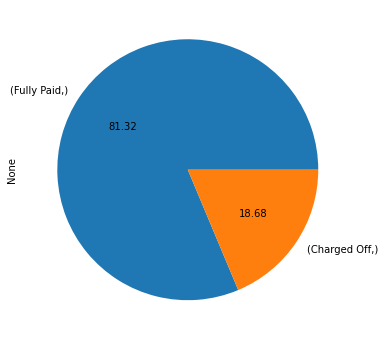

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))
pd.DataFrame(y_train).value_counts().plot.pie(autopct="%.2f", ax=ax)

In [32]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier

# transform train-test 
X_train_transf = preprocessing_transf.fit_transform(X_train, y_train)
X_test_transf = preprocessing_transf.transform(X_test)

# preparing model
classifier = RandomForestClassifier(random_state=99)
classifier.fit(X_train_transf, y_train)
y_pred =classifier.predict(X_test_transf)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

Charged Off       0.48      0.05      0.99      0.09      0.23      0.05      8518
 Fully Paid       0.82      0.99      0.05      0.89      0.23      0.06     36925

avg / total       0.76      0.81      0.23      0.74      0.23      0.05     45443



The model tends to ignore the `Charged Off` due to its low probability of occurence hence very low recall!

Let's try with undersampled data!

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rand_us = RandomUnderSampler(random_state=99, sampling_strategy=0.6)

X_train_res, y_train_res = rand_us.fit_resample(X_train, y_train)

print(f'Undersampled dataset shape: {Counter(y_train_res)}')

Undersampled dataset shape: Counter({'Fully Paid': 56595, 'Charged Off': 33957})


In [34]:
X_train_res_transf = preprocessing_transf.fit_transform(X_train_res, y_train_res)
X_test_transf = preprocessing_transf.transform(X_test)

classifier = RandomForestClassifier(random_state=99)
classifier.fit(X_train_res_transf, y_train_res)
y_pred_res = classifier.predict(X_test_transf)

print(classification_report_imbalanced(y_test, y_pred_res))

                   pre       rec       spe        f1       geo       iba       sup

Charged Off       0.35      0.39      0.83      0.37      0.57      0.31      8518
 Fully Paid       0.86      0.83      0.39      0.84      0.57      0.34     36925

avg / total       0.76      0.75      0.48      0.75      0.57      0.34     45443



The `Charged Off` recall is significantly increased, with consequences of reduced `Fully Paid` recall. Although the recall is still low (the model missed 60% of the potential `Charged Off` loan), this is the right stepping stone for our model. 

We will continue to use the undersampled dataset. Note that the fitted parameters shall conform with the processed undersampled dataset. After outliers cleaning, we will re-fit our transformer and continue to model selection and hyper tuning the model to get the most optimal precision-recall value.

## 4. Outliers Handling

From previous chapter, we discovered that these features suffers from outliers: 

- `revol_util`
- `loan_amnt`
- `installment`
- `tot_cur_bal`
- `annual_inc`
- `inq_last_6mths`
- `total_rev_hi_lim`
- `total_acc`
- `open_acc`
- `collection_12_mths_ex_meds`
- `pub_rec`
- `acc_now_delinq`
- `total_coll_amnt`

Let's discover each features and decide what to do!

#### **Analyzing Bivariate Relationship**

Let's take a look at the correlation coefficient of our new dataset! We specifically use pearson to identify linear relationship and take a look if there were some data that highly deviates.

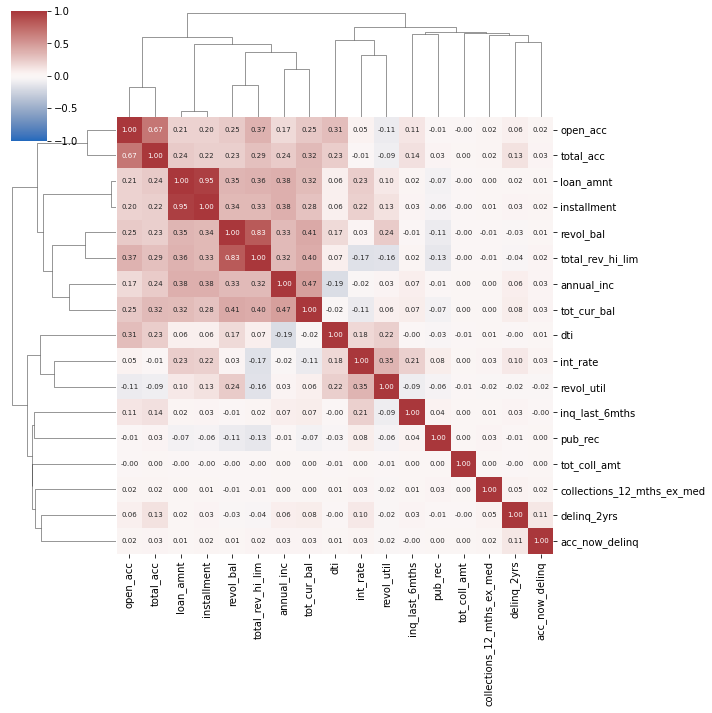

In [35]:
import seaborn as sns

X_train_res_corr = AttributesDropper().fit_transform(X_train_res).corr(method='pearson')
sns.clustermap(X_train_res_corr, vmin=-1, vmax=1, center=0, cmap='vlag', annot=True, fmt='.2f', annot_kws={'size': 7})

Let's first analyze `loan_amnt` and `installment`. 

In [36]:
X_train_res['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [37]:
X_train_res['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

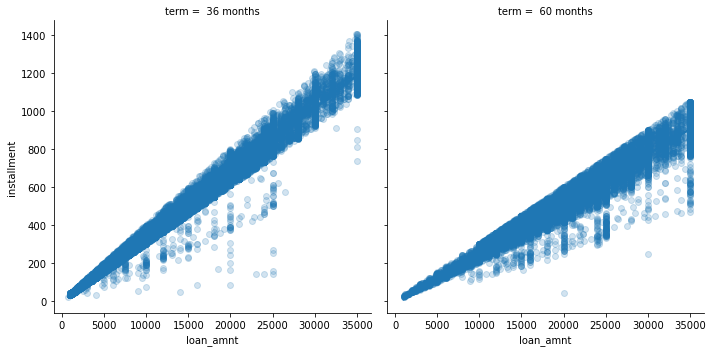

In [38]:
sns.lmplot(x='loan_amnt', y='installment', col='term',
            data=X_train_res, scatter_kws={'alpha': 0.2})


Points observed:

- `Loan_amnt` is capped at 35,000. Installment is varied according to the interest.
- There is some eye-catching noise: Some monthly installment is far less than `loan_amnt` / `term` (for example, for 25,000 loan with 36 months term, the minimum monthly installment (ignoring interest) is around 555, but there were less installment exist such as 200 dollars.). Without knowing more information about this situation, I will drop those loan records.

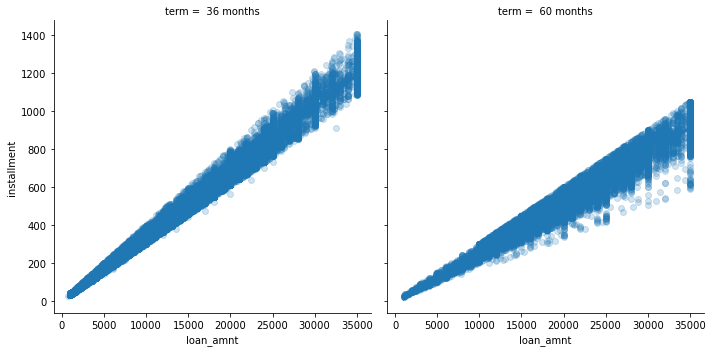

In [39]:
X_train_res['term_month'] = X_train_res['term'].map({' 36 months': 36, ' 60 months': 60})

subset_index = X_train_res[(X_train_res['installment'] > (X_train_res['loan_amnt'] / X_train_res['term_month']))].index
X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

X_train_res.drop('term_month', axis=1, inplace=True)

sns.lmplot(x='loan_amnt', y='installment', col='term',
            data=X_train_res, scatter_kws={'alpha': 0.2})

Then we will analyse `revol_bal` and `total_rev_hi_lim`. 

<AxesSubplot:xlabel='revol_bal', ylabel='total_rev_hi_lim'>

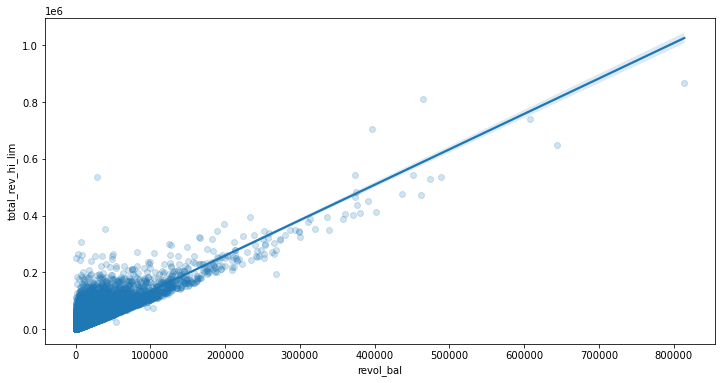

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(x='revol_bal', y='total_rev_hi_lim',
            data=X_train_res, scatter_kws={'alpha': 0.2}, ax=ax)

I will discard the high noise ratio of `total_rev_hi_lim` / `revol_bal`.

<AxesSubplot:xlabel='revol_bal', ylabel='total_rev_hi_lim'>

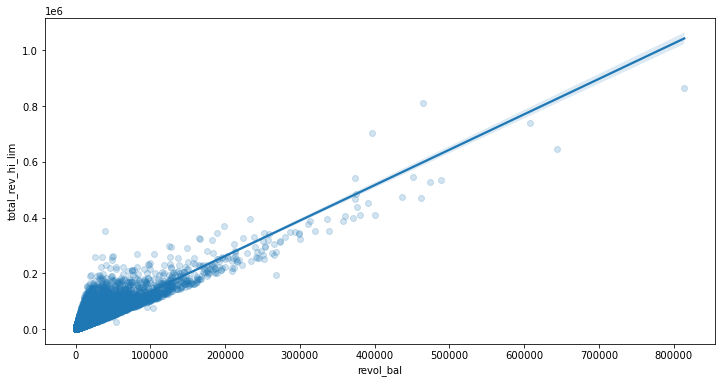

In [41]:
subset_index = X_train_res[((X_train_res['total_rev_hi_lim'] / X_train_res['revol_bal'])  < 10)].index

X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x='revol_bal', y='total_rev_hi_lim',
            data=X_train_res, scatter_kws={'alpha': 0.2}, ax=ax)

#### **Analyzing Box-Whisker Plot**

For other variables, we will analyze outliers that is significantly far from our whisker.

#### **`revol_util`**

Text(0.5, 1.0, 'Central Tendency, revol_util')

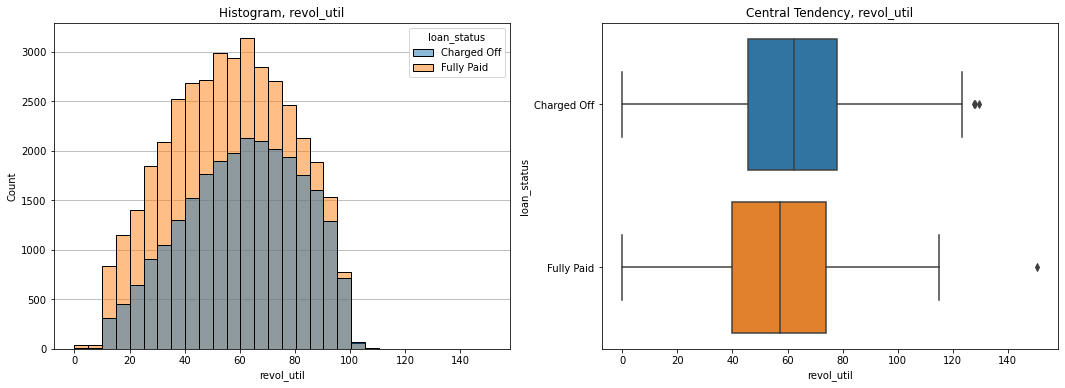

In [42]:
feature = 'revol_util'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [43]:
subset_index = X_train_res[(X_train_res['revol_util']  < 140)].index

X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`tot_cur_bal`**

Text(0.5, 1.0, 'Central Tendency, tot_cur_bal')

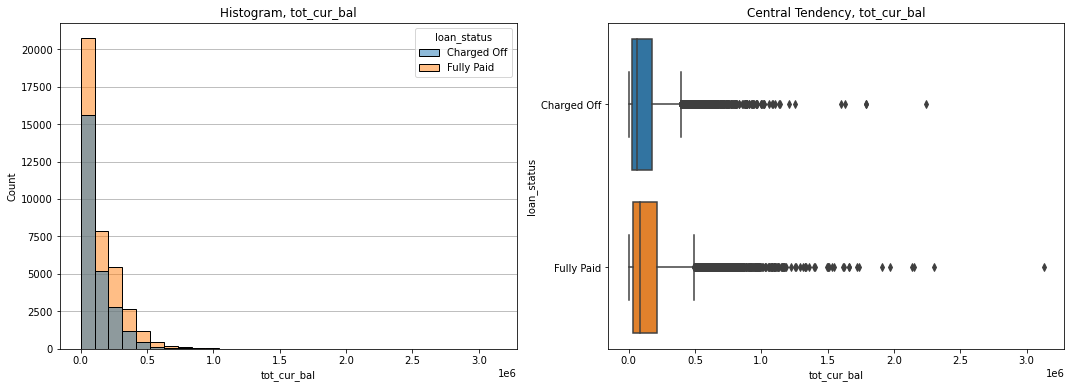

In [44]:
feature = 'tot_cur_bal'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [45]:
subset_index = X_train_res[(X_train_res['tot_cur_bal']  < 1500000)].index

X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`annual_inc`**

Text(0.5, 1.0, 'Central Tendency, annual_inc')

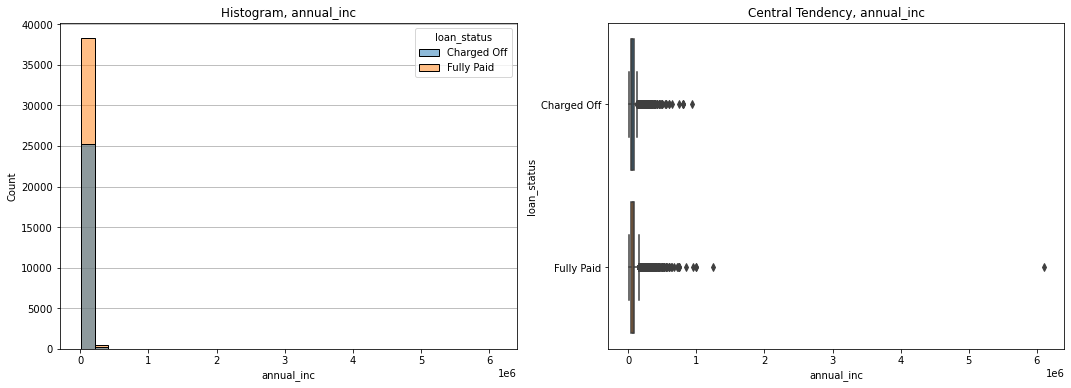

In [46]:
feature = 'annual_inc'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [47]:
subset_index = X_train_res[(X_train_res['annual_inc']  < 2000000)].index

X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`total_rev_hi_lim`**

Text(0.5, 1.0, 'Central Tendency, total_rev_hi_lim')

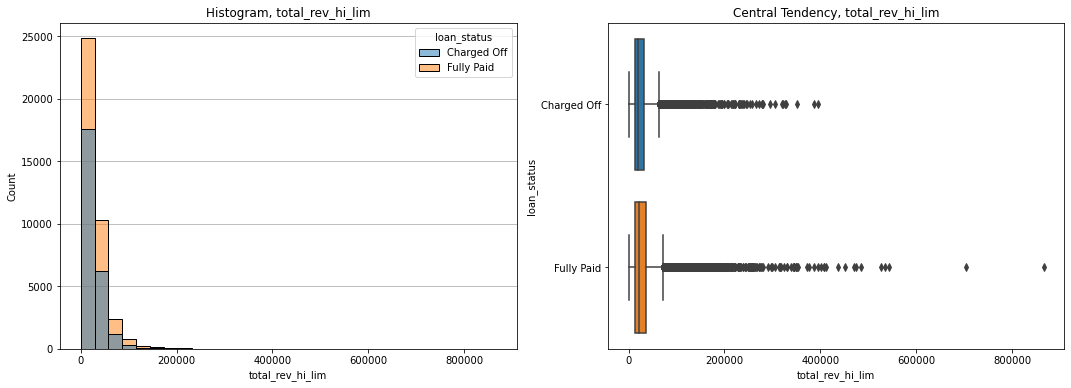

In [48]:
feature = 'total_rev_hi_lim'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [49]:
subset_index = X_train_res[(X_train_res['total_rev_hi_lim']  < 600000)].index

X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

In [50]:
#### **`total_acc`**

Text(0.5, 1.0, 'Central Tendency, total_acc')

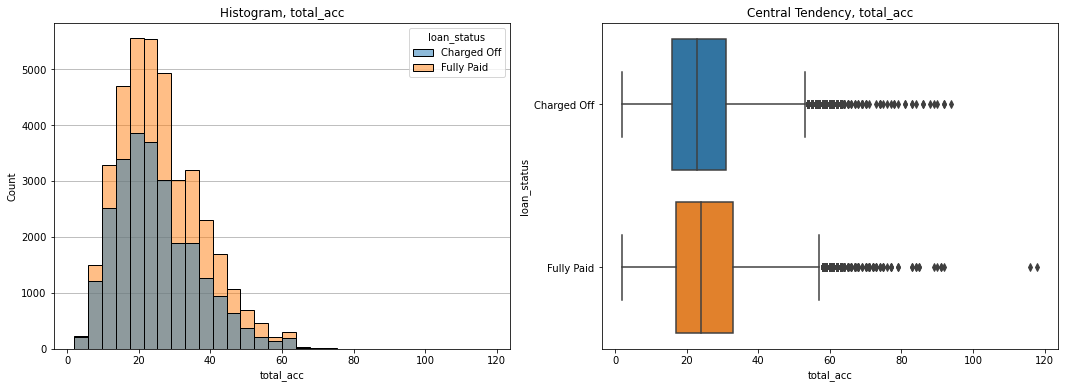

In [51]:
feature = 'total_acc'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [52]:
subset_index = X_train_res[(X_train_res['total_acc']  < 100)].index
X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`delinq_2yrs`**

Text(0.5, 1.0, 'Central Tendency, delinq_2yrs')

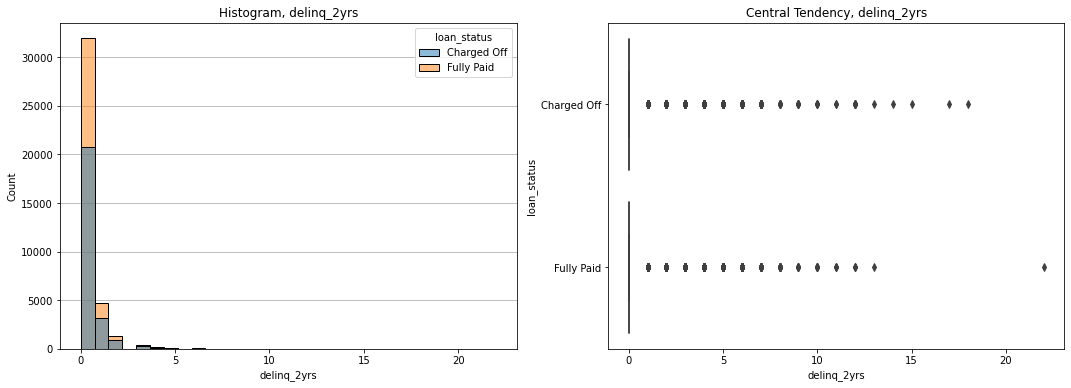

In [53]:
feature = 'delinq_2yrs'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [54]:
subset_index = X_train_res[(X_train_res['delinq_2yrs']  < 20)].index
X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`revol_bal`**

Text(0.5, 1.0, 'Central Tendency, revol_bal')

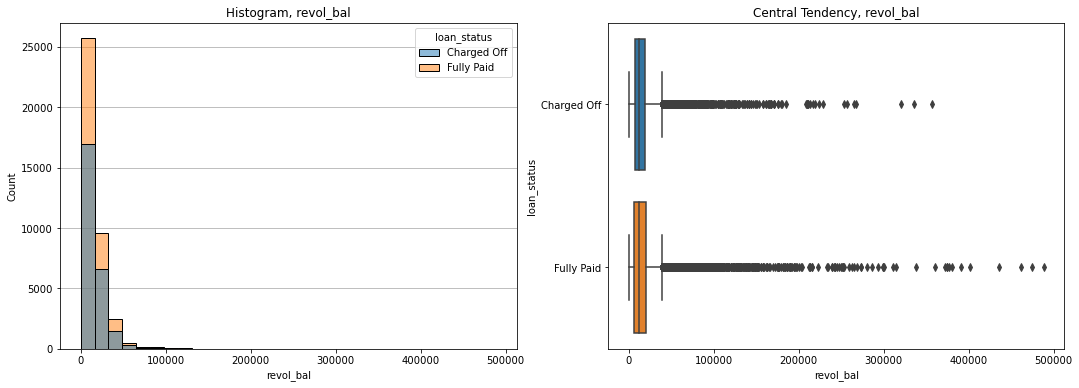

In [55]:
feature = 'revol_bal'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [56]:
subset_index = X_train_res[(X_train_res['revol_bal']  < 600000)].index
X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

#### **`total_col_amnt`**

Text(0.5, 1.0, 'Central Tendency, tot_coll_amt')

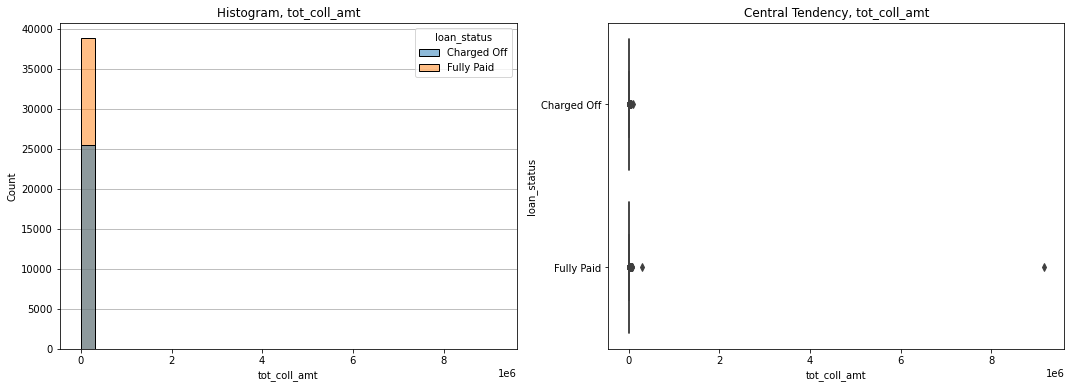

In [57]:
feature = 'tot_coll_amt'

fig, ax= plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=X_train_res, x=feature, bins=30, hue=y_train_res, ax=ax[0])
sns.boxplot(data=X_train_res, x=feature, y=y_train_res, ax=ax[1])
ax[0].grid(visible=True, axis='y')
ax[0].set_axisbelow(True)
ax[0].set_title(f'Histogram, {feature}')
ax[1].set_title(f'Central Tendency, {feature}')

In [58]:
subset_index = X_train_res[(X_train_res['tot_coll_amt']  < 8000000)].index
X_train_res = X_train_res.iloc[subset_index].reset_index(drop=True)
y_train_res = y_train_res.iloc[subset_index].reset_index(drop=True)

## 5. Final Fit and Transformation Pipeline

#### **Final Fitting**

In [59]:
X_train_res_transf = preprocessing_transf.fit_transform(X_train_res)
X_test_transf = preprocessing_transf.transform(X_test)

classifier = RandomForestClassifier(random_state=99)
classifier.fit(X_train_res_transf, y_train_res)
y_pred_res = classifier.predict(X_test_transf)

print(classification_report_imbalanced(y_test, y_pred_res))

                   pre       rec       spe        f1       geo       iba       sup

Charged Off       0.34      0.40      0.82      0.37      0.58      0.32      8518
 Fully Paid       0.86      0.82      0.40      0.84      0.58      0.34     36925

avg / total       0.76      0.74      0.48      0.75      0.58      0.34     45443



Later we will improve the performance more by selecting most fit baseline model and tuning the hyperparameter.

#### **Exporting Transformer**

In [60]:
from joblib import dump

dump(preprocessing_transf, parent_dir + '\Models\preprocessing_transf.joblib')

['d:\\JOB APP\\4 RAKAMIN\\1 VIE Data Science IDX Partners\\creditriskpredictionml\\Models\\preprocessing_transf.joblib']

#### **Exporting Resampled Dataset**

In [61]:
X_train_res.to_csv(parent_dir + '\Output\X_train_res.csv', index=False)
y_train_res.to_csv(parent_dir + '\Output\y_train_res.csv', index=False)
X_test.to_csv(parent_dir + '\Output\X_test.csv', index=False)
y_test.to_csv(parent_dir + '\Output\y_test.csv', index=False)